Introdução ao problema:
Enem 2023 -> Objetivo mostrar o aprendizado durante todo o tempo presente do GEIA.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

"""
Autor: Marcos Dias

Descrição:
    Manipulação e análise de dados dos estudantes do ENEM 2023, abrangendo todas as áreas:
    Matemática, Ciências Humanas, Ciências da Natureza e Linguagens.
    Foram realizadas visualizações com boxplot e gráfico de linha com pontos
    para explorar a distribuição e tendências das notas nessas disciplinas.
"""

# Carregar os dados
df = pd.read_csv('MICRODADOS_ENEM_2023.csv', encoding='ISO-8859-1', sep=';')

# Visualizar as primeiras linhas
print(df.head())

# Verificar informações básicas
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

   NU_INSCRICAO  NU_ANO  TP_FAIXA_ETARIA TP_SEXO  TP_ESTADO_CIVIL  \
0  210059085136    2023               14       M                2   
1  210059527735    2023               12       M                2   
2  210061103945    2023                6       F                1   
3  210060214087    2023                2       F                1   
4  210059980948    2023                3       F                1   

   TP_COR_RACA  TP_NACIONALIDADE  TP_ST_CONCLUSAO  TP_ANO_CONCLUIU  TP_ESCOLA  \
0            1                 1                1               17          1   
1            1                 0                1               16          1   
2            1                 1                1                0          1   
3            3                 1                2                0          2   
4            3                 1                2                0          2   

   ...  Q016  Q017  Q018 Q019  Q020 Q021  Q022  Q023  Q024  Q025  
0  ...     C     C     B    B  

In [6]:
# Tratar valores nulos nas notas usando a mediana de cada prova
df['NU_NOTA_CH'] = df['NU_NOTA_CH'].fillna(df['NU_NOTA_CH'].median())
df['NU_NOTA_CN'] = df['NU_NOTA_CN'].fillna(df['NU_NOTA_CN'].median())
df['NU_NOTA_LC'] = df['NU_NOTA_LC'].fillna(df['NU_NOTA_LC'].median())
df['NU_NOTA_MT'] = df['NU_NOTA_MT'].fillna(df['NU_NOTA_MT'].median())

# Filtrar apenas participantes que fizeram cada prova
df_ch = df[df['TP_PRESENCA_CH'] == 1].copy()
df_cn = df[df['TP_PRESENCA_CN'] == 1].copy()
df_lc = df[df['TP_PRESENCA_LC'] == 1].copy()
df_mt = df[df['TP_PRESENCA_MT'] == 1].copy()

# Converter faixa etária para categoria
df_ch['TP_FAIXA_ETARIA'] = df_ch['TP_FAIXA_ETARIA'].astype('category')
df_cn['TP_FAIXA_ETARIA'] = df_cn['TP_FAIXA_ETARIA'].astype('category')
df_lc['TP_FAIXA_ETARIA'] = df_lc['TP_FAIXA_ETARIA'].astype('category')
df_mt['TP_FAIXA_ETARIA'] = df_mt['TP_FAIXA_ETARIA'].astype('category')

# Tratar outliers (notas acima de 3 desvios padrão da média)
mean_ch, std_ch = df_ch['NU_NOTA_CH'].mean(), df_ch['NU_NOTA_CH'].std()
mean_cn, std_cn = df_cn['NU_NOTA_CN'].mean(), df_cn['NU_NOTA_CN'].std()
mean_lc, std_lc = df_lc['NU_NOTA_LC'].mean(), df_lc['NU_NOTA_LC'].std()
mean_mt, std_mt = df_mt['NU_NOTA_MT'].mean(), df_mt['NU_NOTA_MT'].std()

df_ch = df_ch[df_ch['NU_NOTA_CH'] <= mean_ch + 3*std_ch]
df_cn = df_cn[df_cn['NU_NOTA_CN'] <= mean_cn + 3*std_cn]
df_lc = df_lc[df_lc['NU_NOTA_LC'] <= mean_lc + 3*std_lc]
df_mt = df_mt[df_mt['NU_NOTA_MT'] <= mean_mt + 3*std_mt]

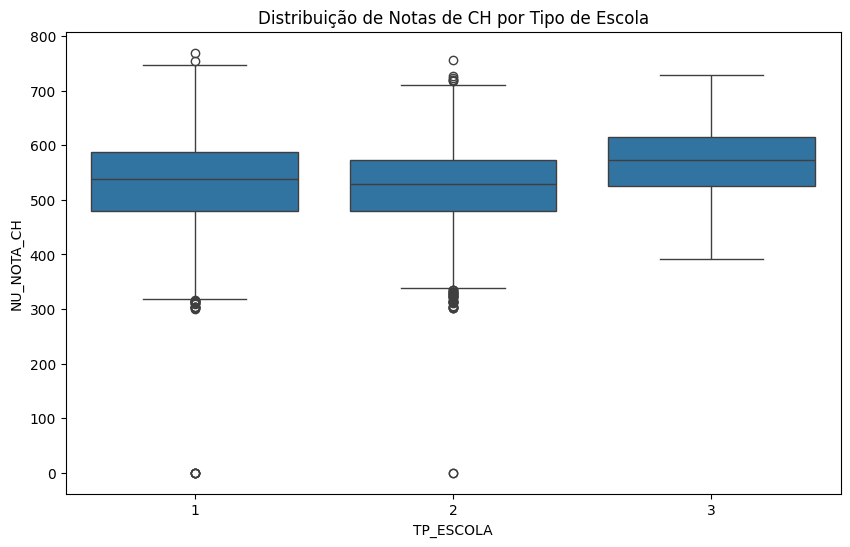

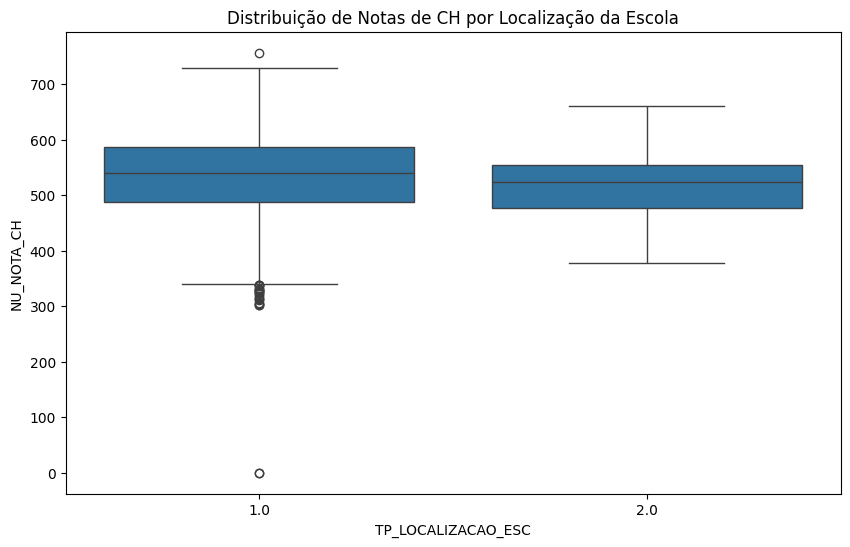

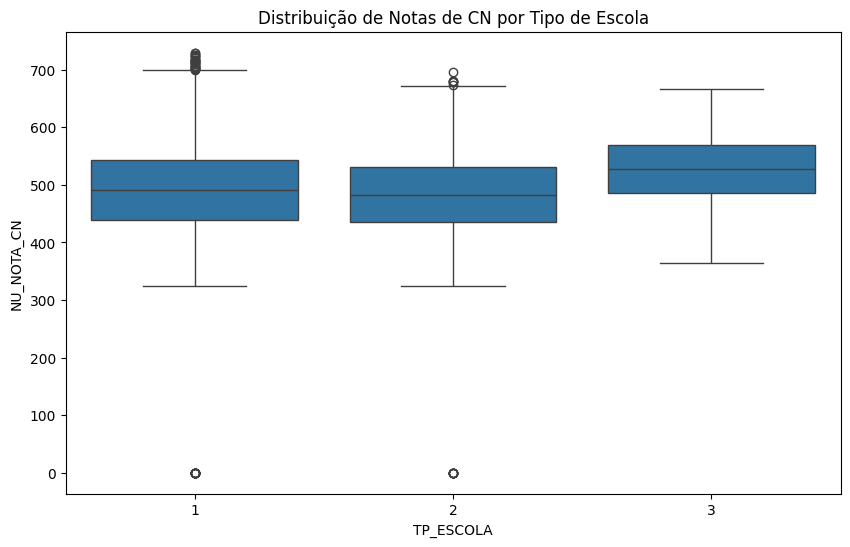

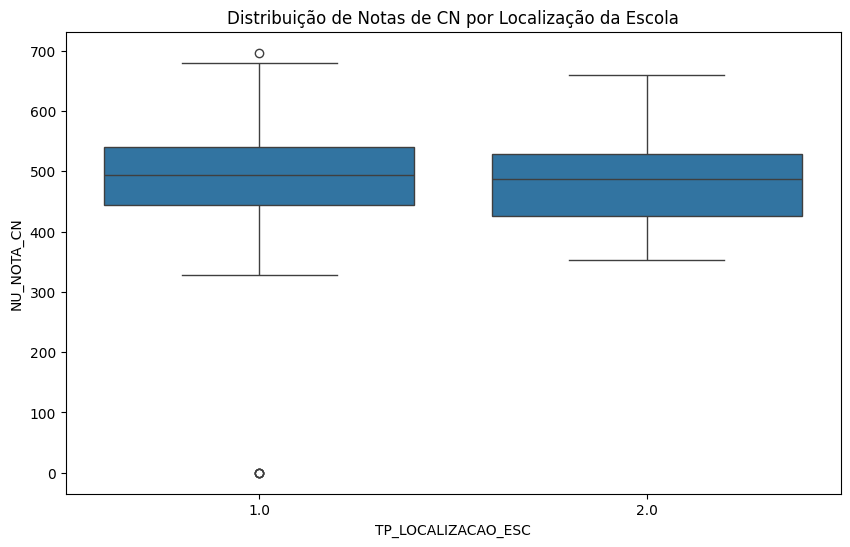

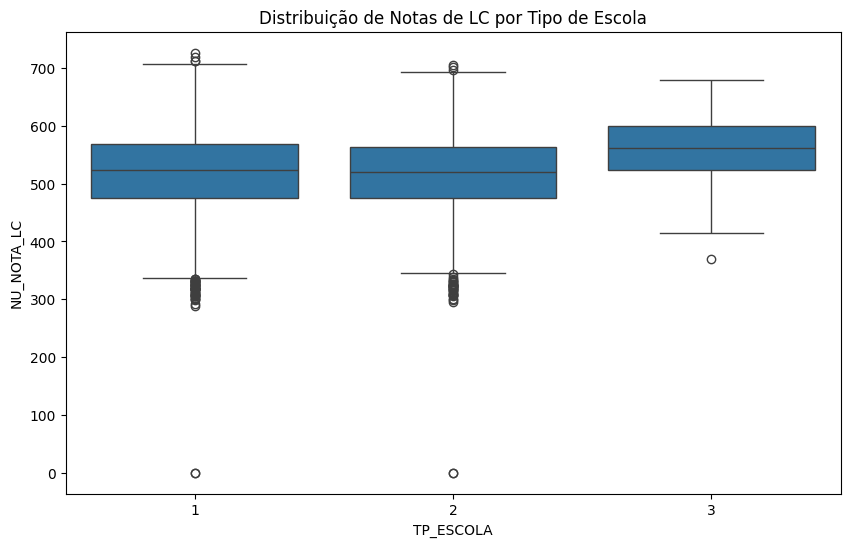

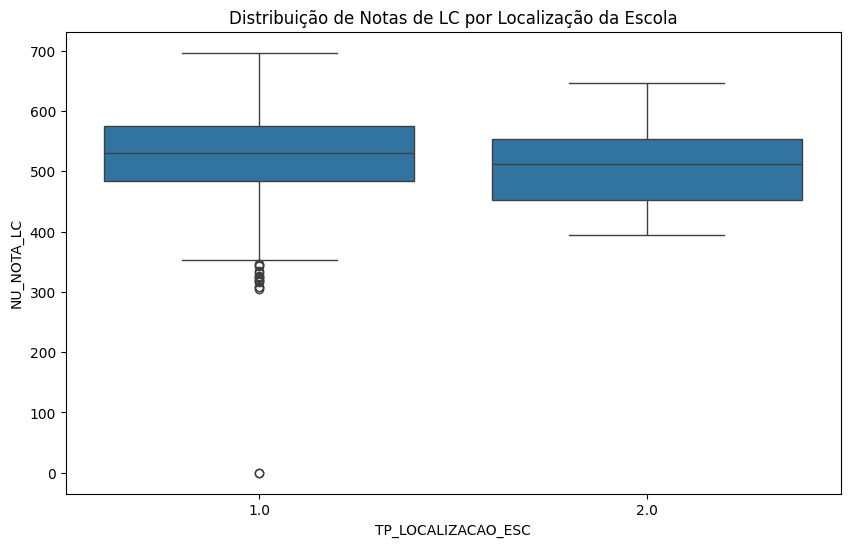

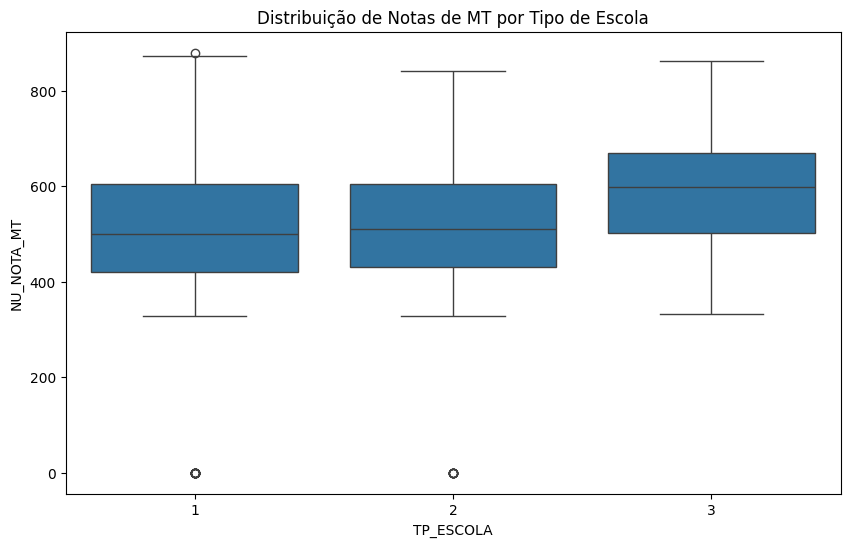

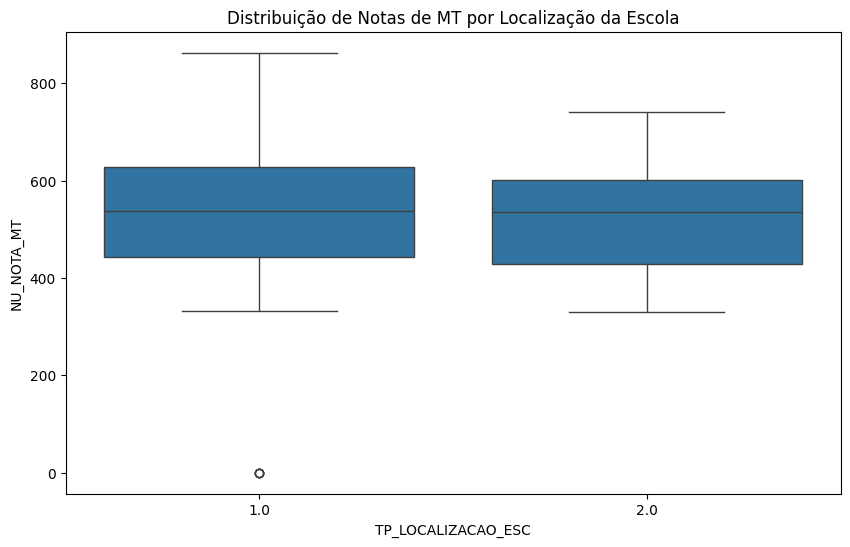

In [10]:
"""
Descrição:
    Análise das notas do ENEM 2023 por localização da escola (urbana/rural) e tipo de escola.
    Foram explorados fatores que influenciam valores atípicos (outliers) em cada área do conhecimento:
    Ciências Humanas (CH), Ciências da Natureza (CN), Linguagens e Códigos (LC) e Matemática (MT).
    A análise utiliza boxplots para comparar a distribuição das notas entre diferentes contextos escolares.
"""

# CH
plt.figure(figsize=(10,6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CH', data=df_ch)
plt.title('Distribuição de Notas de CH por Tipo de Escola')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_CH', data=df_ch)
plt.title('Distribuição de Notas de CH por Localização da Escola')
plt.show()

# CN
plt.figure(figsize=(10,6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_CN', data=df_cn)
plt.title('Distribuição de Notas de CN por Tipo de Escola')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_CN', data=df_cn)
plt.title('Distribuição de Notas de CN por Localização da Escola')
plt.show()

# LC
plt.figure(figsize=(10,6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_LC', data=df_lc)
plt.title('Distribuição de Notas de LC por Tipo de Escola')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_LC', data=df_lc)
plt.title('Distribuição de Notas de LC por Localização da Escola')
plt.show()

# MT
plt.figure(figsize=(10,6))
sns.boxplot(x='TP_ESCOLA', y='NU_NOTA_MT', data=df_mt)
plt.title('Distribuição de Notas de MT por Tipo de Escola')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='TP_LOCALIZACAO_ESC', y='NU_NOTA_MT', data=df_mt)
plt.title('Distribuição de Notas de MT por Localização da Escola')
plt.show()

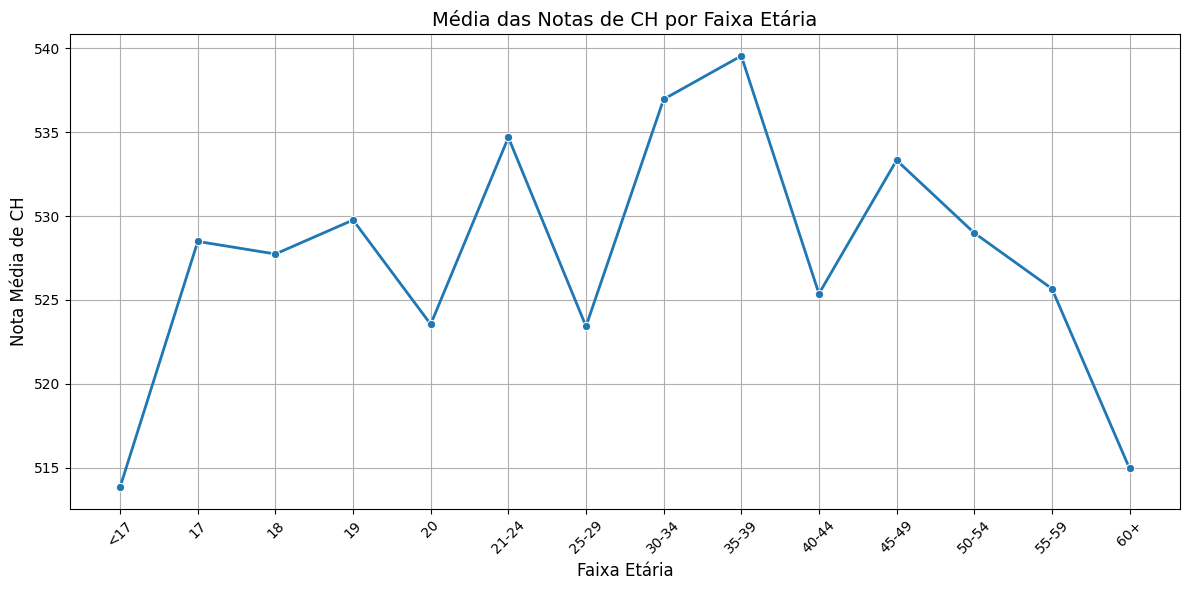

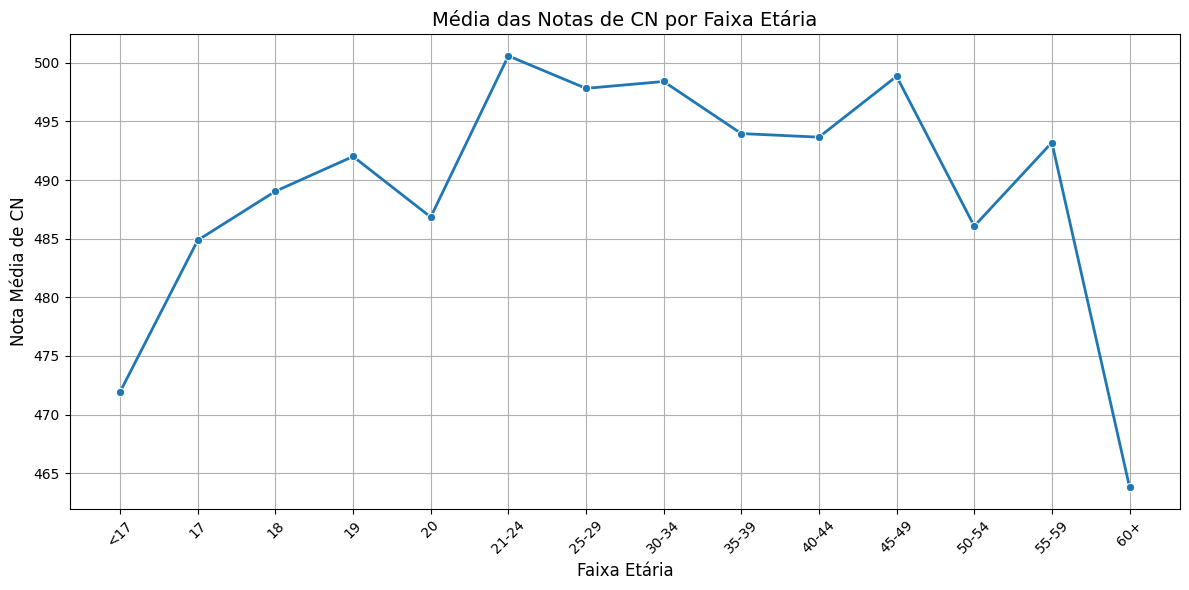

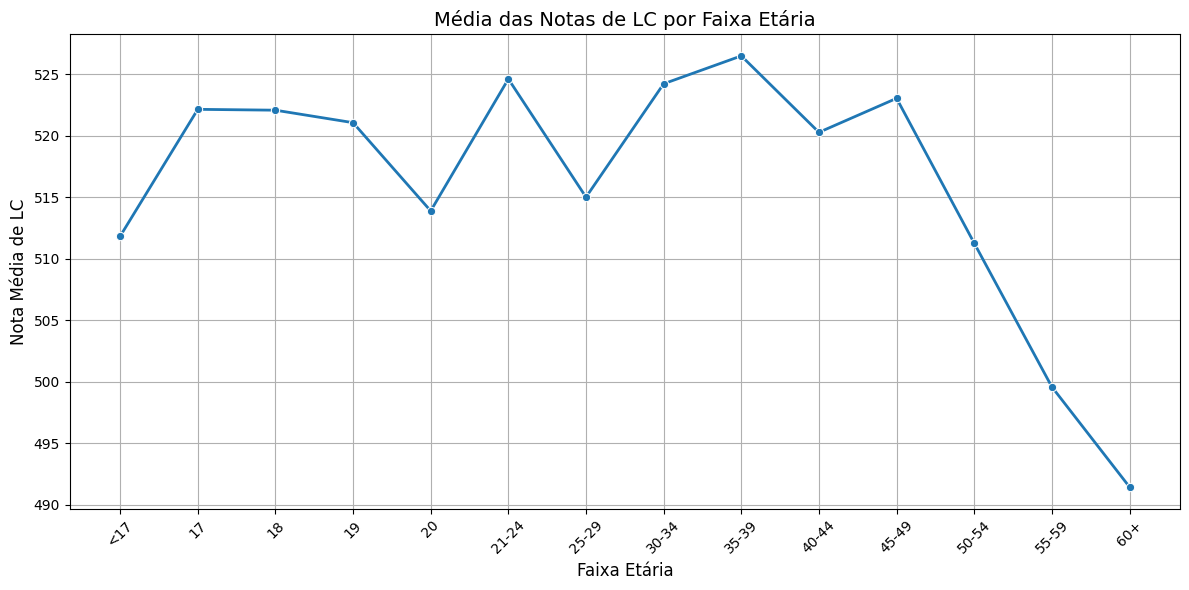

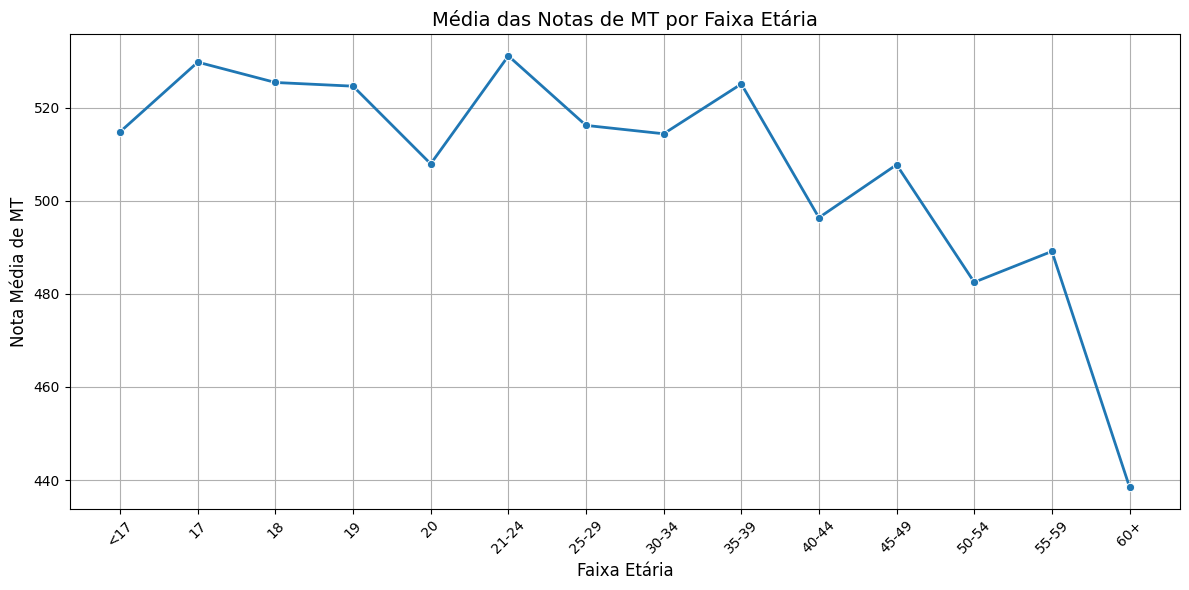

In [9]:
"""
Descrição:
    Análise da relação entre faixa etária dos participantes e o desempenho médio nas provas do ENEM 2023.
    Para cada área do conhecimento (Ciências Humanas, Ciências da Natureza, Linguagens e Matemática),
    foram calculadas as médias das notas por faixa etária e visualizadas em gráficos de linha com pontos.
    Essa abordagem permite identificar tendências e possíveis variações no desempenho conforme a idade dos candidatos.
"""



faixa_etaria_labels = {
    1: '<17',
    2: '17',
    3: '18',
    4: '19',
    5: '20',
    6: '21-24',
    7: '25-29',
    8: '30-34',
    9: '35-39',
    10: '40-44',
    11: '45-49',
    12: '50-54',
    13: '55-59',
    14: '60+'
}

# CH
df_ch['FAIXA_ETARIA_LABEL'] = df_ch['TP_FAIXA_ETARIA'].map(faixa_etaria_labels)
media_faixa_etaria_ch = df_ch.groupby('FAIXA_ETARIA_LABEL')['NU_NOTA_CH'].mean().reindex(faixa_etaria_labels.values())
plt.figure(figsize=(12,6))
sns.lineplot(x=media_faixa_etaria_ch.index, y=media_faixa_etaria_ch.values, marker='o', linewidth=2)
plt.title('Média das Notas de CH por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nota Média de CH', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# CN
df_cn['FAIXA_ETARIA_LABEL'] = df_cn['TP_FAIXA_ETARIA'].map(faixa_etaria_labels)
media_faixa_etaria_cn = df_cn.groupby('FAIXA_ETARIA_LABEL')['NU_NOTA_CN'].mean().reindex(faixa_etaria_labels.values())
plt.figure(figsize=(12,6))
sns.lineplot(x=media_faixa_etaria_cn.index, y=media_faixa_etaria_cn.values, marker='o', linewidth=2)
plt.title('Média das Notas de CN por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nota Média de CN', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# LC
df_lc['FAIXA_ETARIA_LABEL'] = df_lc['TP_FAIXA_ETARIA'].map(faixa_etaria_labels)
media_faixa_etaria_lc = df_lc.groupby('FAIXA_ETARIA_LABEL')['NU_NOTA_LC'].mean().reindex(faixa_etaria_labels.values())
plt.figure(figsize=(12,6))
sns.lineplot(x=media_faixa_etaria_lc.index, y=media_faixa_etaria_lc.values, marker='o', linewidth=2)
plt.title('Média das Notas de LC por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nota Média de LC', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MT
df_mt['FAIXA_ETARIA_LABEL'] = df_mt['TP_FAIXA_ETARIA'].map(faixa_etaria_labels)
media_faixa_etaria_mt = df_mt.groupby('FAIXA_ETARIA_LABEL')['NU_NOTA_MT'].mean().reindex(faixa_etaria_labels.values())
plt.figure(figsize=(12,6))
sns.lineplot(x=media_faixa_etaria_mt.index, y=media_faixa_etaria_mt.values, marker='o', linewidth=2)
plt.title('Média das Notas de MT por Faixa Etária', fontsize=14)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nota Média de MT', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()